In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from dateutil import relativedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv(r"Dataset/Churn_Modelling.csv")
print(df.shape)
print(df.columns)
df.head()

(10000, 14)
Index(['CustomerId', 'CreditScore', 'Region', 'Gender', 'Age', 'ACCT_OPN_DATE',
       'M_Minus_one_Bal', 'Total_FD_Amt', 'HasCrCard', 'Last_Login_Date',
       'EstimatedSalary', 'Acct_Cls_Flag', 'Current_balance',
       'M_Minus_two_Bal'],
      dtype='object')


,CustomerId,CreditScore,Region,Gender,Age,ACCT_OPN_DATE,M_Minus_one_Bal,Total_FD_Amt,HasCrCard,Last_Login_Date,EstimatedSalary,Acct_Cls_Flag,Current_balance,M_Minus_two_Bal
0,15586039,471,Western,Female,36,08-03-2023,304683,490000,0,08-06-2023,96366.70,0,415351,292972
1,15723250,519,South,Male,42,08-12-2022,37261,490000,1,08-06-2023,101485.72,0,396451,123094
2,15581840,626,South,Male,33,08-12-2022,346591,500000,1,08-08-2023,138504.28,0,22758,55854
3,15662238,822,South,Male,37,08-05-2023,393118,500000,1,08-08-2023,182624.93,0,340244,278305
4,15795151,705,South,Female,38,08-05-2023,107895,480000,0,08-05-2023,21177.10,0,317835,131458


In [3]:
df['ACCT_OPN_DATE'] = pd.to_datetime(df['ACCT_OPN_DATE'],format = "%d-%m-%Y")
df['Last_Login_Date'] = pd.to_datetime(df['Last_Login_Date'],format = "%d-%m-%Y")

df["Acct_vintage"] = ((datetime.today() - df['ACCT_OPN_DATE'])/np.timedelta64(1,'D')).astype('int')
df["Login_vintage"] = ((datetime.today() - df['Last_Login_Date'])/np.timedelta64(1,'D')).astype('int')

In [4]:
df.head()

,CustomerId,CreditScore,Region,Gender,Age,ACCT_OPN_DATE,M_Minus_one_Bal,Total_FD_Amt,HasCrCard,Last_Login_Date,EstimatedSalary,Acct_Cls_Flag,Current_balance,M_Minus_two_Bal,Acct_vintage,Login_vintage
0,15586039,471,Western,Female,36,2023-03-08,304683,490000,0,2023-06-08,96366.70,0,415351,292972,166,74
1,15723250,519,South,Male,42,2022-12-08,37261,490000,1,2023-06-08,101485.72,0,396451,123094,256,74
2,15581840,626,South,Male,33,2022-12-08,346591,500000,1,2023-08-08,138504.28,0,22758,55854,256,13
3,15662238,822,South,Male,37,2023-05-08,393118,500000,1,2023-08-08,182624.93,0,340244,278305,105,13
4,15795151,705,South,Female,38,2023-05-08,107895,480000,0,2023-05-08,21177.10,0,317835,131458,105,105


In [5]:
# EDA

In [6]:
df.isna().sum()

CustomerId         0
CreditScore        0
Region             0
Gender             0
Age                0
ACCT_OPN_DATE      0
M_Minus_one_Bal    0
Total_FD_Amt       0
HasCrCard          0
Last_Login_Date    0
EstimatedSalary    0
Acct_Cls_Flag      0
Current_balance    0
M_Minus_two_Bal    0
Acct_vintage       0
Login_vintage      0
dtype: int64

In [7]:
df.dtypes

CustomerId                  int64
CreditScore                 int64
Region                     object
Gender                     object
Age                         int64
ACCT_OPN_DATE      datetime64[ns]
M_Minus_one_Bal             int64
Total_FD_Amt                int64
HasCrCard                   int64
Last_Login_Date    datetime64[ns]
EstimatedSalary           float64
Acct_Cls_Flag               int64
Current_balance             int64
M_Minus_two_Bal             int64
Acct_vintage                int32
Login_vintage               int32
dtype: object

In [8]:
df.describe()

,CustomerId,CreditScore,Age,M_Minus_one_Bal,Total_FD_Amt,HasCrCard,EstimatedSalary,Acct_Cls_Flag,Current_balance,M_Minus_two_Bal,Acct_vintage,Login_vintage
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,198207.09300,247731.000000,0.500000,100090.239881,0.203700,252054.603000,152114.889300,165.396500,50.778600
std,7.193619e+04,96.653299,10.487806,114969.06013,145079.931271,0.500025,57510.492818,0.402769,143646.738805,86468.450284,87.540422,30.380548
min,1.556570e+07,350.000000,18.000000,1000.00000,0.000000,0.000000,11.580000,0.000000,1055.000000,2013.000000,13.000000,13.000000
25%,1.562853e+07,584.000000,32.000000,99148.00000,120000.000000,0.000000,51002.110000,0.000000,129622.500000,76116.000000,105.000000,13.000000
50%,1.569074e+07,652.000000,37.000000,197064.50000,240000.000000,0.500000,100193.915000,0.000000,251741.500000,152882.500000,166.000000,44.000000
75%,1.575323e+07,718.000000,44.000000,297754.00000,370000.000000,1.000000,149388.247500,0.000000,376114.000000,227375.750000,225.000000,74.000000
max,1.581569e+07,850.000000,92.000000,399979.00000,500000.000000,1.000000,199992.480000,1.000000,499973.000000,299966.000000,317.000000,105.000000


In [9]:
# Bucketing Credit Score

cuts = [0,580,660,720,800,10000]  ## created using business knowledge
labels = ["a.<580","b.580-660","c.660-720","d.720-800","e.800+"]
df['CreditScore_buckets'] = pd.cut(df['CreditScore'],
                            cuts,
                            labels=labels)


cuts = [18,30,40,60,100]  ## created using business knowledge
labels = ["a.18-30","b.30-40","c.40-60","d.60+"]
df['Age_buckets'] = pd.cut(df['Age'],
                            cuts,
                            labels=labels)


In [10]:
df['CreditScore_buckets'].value_counts()*100/len(df)

b.580-660    29.54
a.<580       23.93
c.660-720    22.45
d.720-800    17.63
e.800+        6.45
Name: CreditScore_buckets, dtype: float64

In [11]:
df['Age_buckets'].value_counts()*100/len(df)

b.30-40    44.51
c.40-60    31.17
a.18-30    19.46
d.60+       4.64
Name: Age_buckets, dtype: float64

In [12]:
df['Region'].value_counts()*100/len(df)

South      50.14
Western    25.09
North      24.77
Name: Region, dtype: float64

In [13]:
df['Gender'].value_counts()*100/len(df)

Male      59.31
Female    40.69
Name: Gender, dtype: float64

In [14]:
# Creating Target

target = pd.read_csv(r"Dataset/Target_rollrate_analysis_v1.csv")
print(target.shape)

print(df.shape)
df = pd.merge(df,target,on = 'CustomerId',how = 'inner')
print(df.shape)

(10000, 2)
(10000, 18)
(10000, 19)


In [15]:
df.head(2)

,CustomerId,CreditScore,Region,Gender,Age,ACCT_OPN_DATE,M_Minus_one_Bal,Total_FD_Amt,HasCrCard,Last_Login_Date,EstimatedSalary,Acct_Cls_Flag,Current_balance,M_Minus_two_Bal,Acct_vintage,Login_vintage,CreditScore_buckets,Age_buckets,Churn
0,15586039,471,Western,Female,36,2023-03-08,304683,490000,0,2023-06-08,96366.70,0,415351,292972,166,74,a.<580,b.30-40,0
1,15723250,519,South,Male,42,2022-12-08,37261,490000,1,2023-06-08,101485.72,0,396451,123094,256,74,a.<580,c.40-60,0


In [16]:
df.columns

Index(['CustomerId', 'CreditScore', 'Region', 'Gender', 'Age', 'ACCT_OPN_DATE',
       'M_Minus_one_Bal', 'Total_FD_Amt', 'HasCrCard', 'Last_Login_Date',
       'EstimatedSalary', 'Acct_Cls_Flag', 'Current_balance',
       'M_Minus_two_Bal', 'Acct_vintage', 'Login_vintage',
       'CreditScore_buckets', 'Age_buckets', 'Churn'],
      dtype='object')

In [17]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,CustomerId,CreditScore,Age,ACCT_OPN_DATE,M_Minus_one_Bal,Total_FD_Amt,HasCrCard,Last_Login_Date,EstimatedSalary,Acct_Cls_Flag,...,Gender_Male,CreditScore_buckets_a.<580,CreditScore_buckets_b.580-660,CreditScore_buckets_c.660-720,CreditScore_buckets_d.720-800,CreditScore_buckets_e.800+,Age_buckets_a.18-30,Age_buckets_b.30-40,Age_buckets_c.40-60,Age_buckets_d.60+
0,15586039,471,36,2023-03-08,304683,490000,0,2023-06-08,96366.70,0,...,0,1,0,0,0,0,0,1,0,0
1,15723250,519,42,2022-12-08,37261,490000,1,2023-06-08,101485.72,0,...,1,1,0,0,0,0,0,0,1,0
2,15581840,626,33,2022-12-08,346591,500000,1,2023-08-08,138504.28,0,...,1,0,1,0,0,0,0,1,0,0
3,15662238,822,37,2023-05-08,393118,500000,1,2023-08-08,182624.93,0,...,1,0,0,0,0,1,0,1,0,0
4,15795151,705,38,2023-05-08,107895,480000,0,2023-05-08,21177.10,0,...,0,0,0,1,0,0,0,1,0,0


<AxesSubplot:>

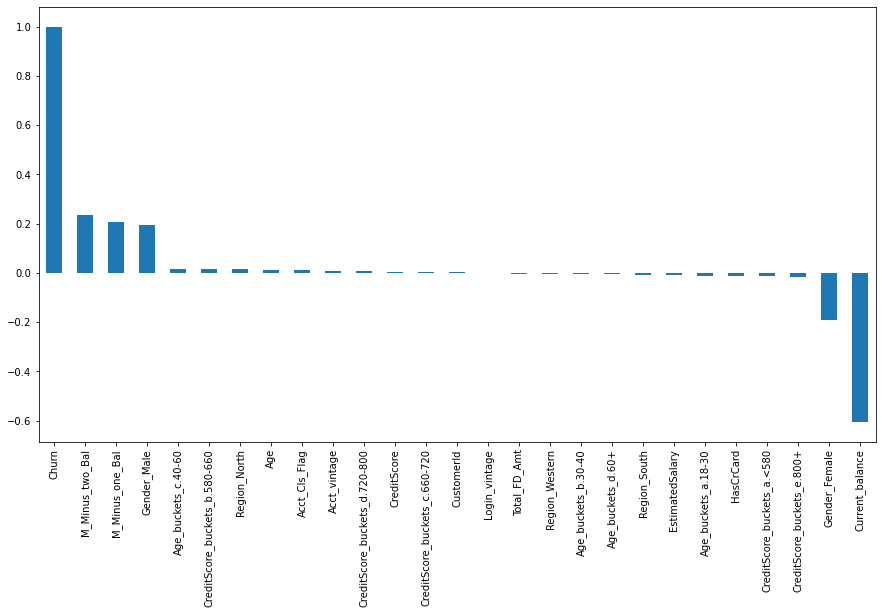

In [18]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [19]:
df.columns

Index(['CustomerId', 'CreditScore', 'Region', 'Gender', 'Age', 'ACCT_OPN_DATE',
       'M_Minus_one_Bal', 'Total_FD_Amt', 'HasCrCard', 'Last_Login_Date',
       'EstimatedSalary', 'Acct_Cls_Flag', 'Current_balance',
       'M_Minus_two_Bal', 'Acct_vintage', 'Login_vintage',
       'CreditScore_buckets', 'Age_buckets', 'Churn'],
      dtype='object')

In [20]:
df.head()

,CustomerId,CreditScore,Region,Gender,Age,ACCT_OPN_DATE,M_Minus_one_Bal,Total_FD_Amt,HasCrCard,Last_Login_Date,EstimatedSalary,Acct_Cls_Flag,Current_balance,M_Minus_two_Bal,Acct_vintage,Login_vintage,CreditScore_buckets,Age_buckets,Churn
0,15586039,471,Western,Female,36,2023-03-08,304683,490000,0,2023-06-08,96366.70,0,415351,292972,166,74,a.<580,b.30-40,0
1,15723250,519,South,Male,42,2022-12-08,37261,490000,1,2023-06-08,101485.72,0,396451,123094,256,74,a.<580,c.40-60,0
2,15581840,626,South,Male,33,2022-12-08,346591,500000,1,2023-08-08,138504.28,0,22758,55854,256,13,b.580-660,b.30-40,1
3,15662238,822,South,Male,37,2023-05-08,393118,500000,1,2023-08-08,182624.93,0,340244,278305,105,13,e.800+,b.30-40,0
4,15795151,705,South,Female,38,2023-05-08,107895,480000,0,2023-05-08,21177.10,0,317835,131458,105,105,c.660-720,b.30-40,0


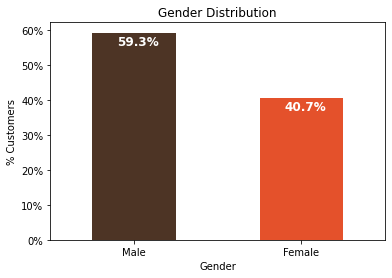

In [21]:
colors = ['#4D3425','#E4512B']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                    stacked = True,
                                                      rot = 0,
                                                      color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

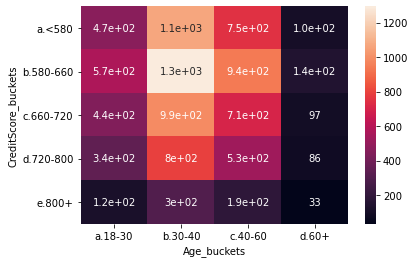

<Figure size 144x72 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from io import StringIO


heatmap = pd.pivot_table(df, values='CustomerId', index=['CreditScore_buckets'], columns=['Age_buckets'], aggfunc='count')
ax = sns.heatmap(data=heatmap, annot=True,)
plt.figure(figsize=(2,1))
plt.show()

Interesting to note that for ages 18-30 and 60+ Credit score detiorates and for 30-40 its the best, which also follows intuitive understanding

Region

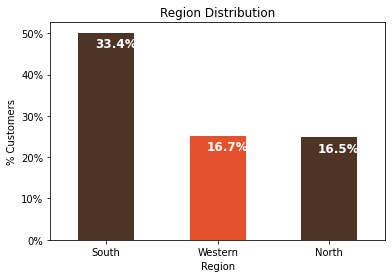

In [23]:
colors = ['#4D3425','#E4512B']
ax = (df['Region'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                    stacked = True,
                                                      rot = 0,
                                                      color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Region')
ax.set_ylabel('% Customers')
ax.set_title('Region Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

<AxesSubplot:xlabel='HasCrCard', ylabel='EstimatedSalary'>

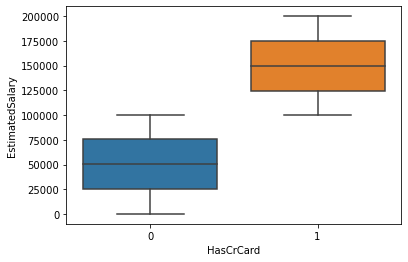

In [24]:
x = df['HasCrCard']
y = df['EstimatedSalary']
sns.boxplot(x = x, y = y)

In [25]:
df.columns

Index(['CustomerId', 'CreditScore', 'Region', 'Gender', 'Age', 'ACCT_OPN_DATE',
       'M_Minus_one_Bal', 'Total_FD_Amt', 'HasCrCard', 'Last_Login_Date',
       'EstimatedSalary', 'Acct_Cls_Flag', 'Current_balance',
       'M_Minus_two_Bal', 'Acct_vintage', 'Login_vintage',
       'CreditScore_buckets', 'Age_buckets', 'Churn'],
      dtype='object')

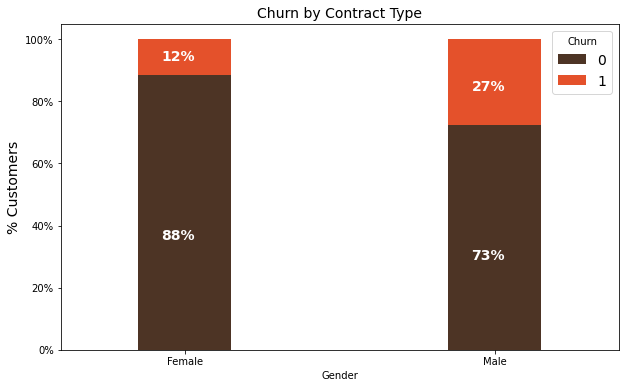

In [26]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Gender','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

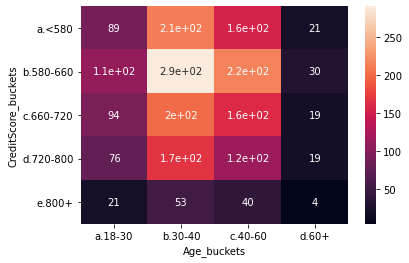

<Figure size 144x72 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from io import StringIO


heatmap = pd.pivot_table(df, values='Churn', index=['CreditScore_buckets'], columns=['Age_buckets'], aggfunc='sum')
ax = sns.heatmap(data=heatmap, annot=True,)
plt.figure(figsize=(2,1))
plt.show()

Its quite clear the churners also are concentrated in age 30 to 60

In [28]:
df.to_csv(r"Dataset/Churn_Modelling_post_EDA.csv",index=False)